In [1]:
pip install pycircos

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install python-circos

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 9.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pycircos
import numpy as np

In [2]:
publications=pd.read_csv("scholia_visualization/publications.csv")

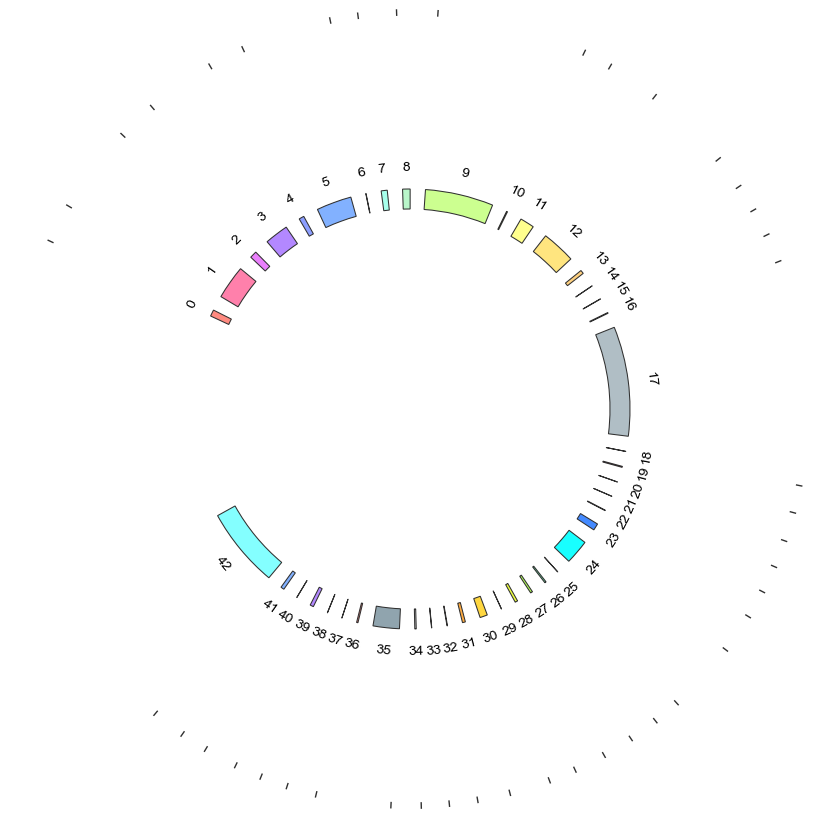

In [4]:
Tarc    = pycircos.Tarc
Tcircle = pycircos.Tcircle
Garc    = pycircos.Garc
Gcircle = pycircos.Gcircle

# get instance of class Gcircle
circle = Gcircle(figsize=(8,8))

publications["sum_of_publications"] = publications["sum_of_publications"].astype(int)

import matplotlib.cm as cm

# Normalize the "average_weighted_year" values
publications["normalized_year"] = (publications["average_weighted_year"] - publications["average_weighted_year"].min()) / (publications["average_weighted_year"].max() - publications["average_weighted_year"].min())

# Create a colormap

for index, row in publications.iterrows():
    size = row["sum_of_publications"]
    
    colormap = cm.get_cmap("YlOrRd")
    colors = colormap(publications["normalized_year"])
    color = colormap(row["normalized_year"])
    
    arc = Garc(arc_id=index#row["disease"]
               , size=size, interspace=4,labelposition=80, label_visible=True, labelsize=10)
    circle.add_garc(arc)
    circle.colors = colors
    



circle.set_garcs(-65,245)

for arc_id in circle.garc_dict:
    circle.tickplot(arc_id, raxis_range=(985,1000), tickinterval=20000000, ticklabels=None)
    
plt.show()

In [5]:
publications.average_weighted_year = round(publications.average_weighted_year)
publications.average_weighted_year = publications.average_weighted_year.astype(int)

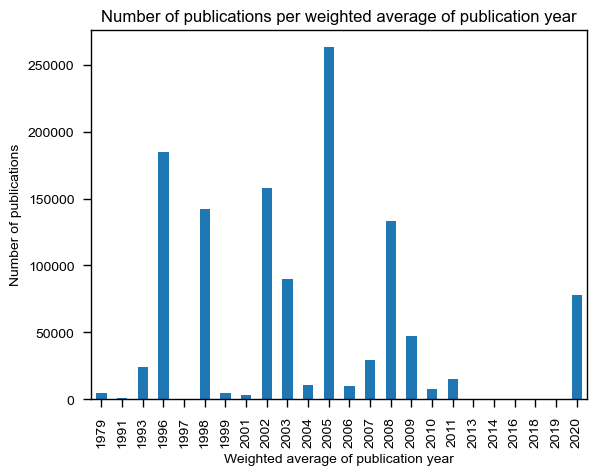

In [6]:
fig, ax = plt.subplots()

grouped_publications = publications.groupby("average_weighted_year")["sum_of_publications"].sum()
grouped_publications.plot.bar()
ax.set_ylabel('Number of publications')
ax.set_xlabel('Weighted average of publication year')
ax.set_title('Number of publications per weighted average of publication year')
plt.show()